<a href="https://colab.research.google.com/github/Rimshay/DEEP-LEARNING/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.6 Predicting house prices: a regression example
### 3.6.1 The Boston Housing Price dataset
we have to predict price
boston housing mid-1970
506 data samples
404 training and 102 testing samples
13 Features (number of columns in X)
### Listing 3.24 Loading the Boston housing dataset

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
train_targets[0]

15.2

### 3.6.2 Preparing the data
Listing 3.25 Normalizing the data

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)

train_data /= std
test_data -= mean
test_data /= std

In [7]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [8]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [9]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [10]:
(21 - 1.84759901e+01)/2.19765689e+00

1.1485004376638608

In [11]:
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## 3.6.3 Building your network

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### Listing 3.27 K-fold validation

In [13]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

### Listing 3.29 Building the history of successive mean K-fold validation scores

In [15]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [16]:
average_mae_history

[4.696352005004883,
 3.6434824466705322,
 3.3847780227661133,
 3.3189806938171387,
 3.0412697792053223,
 3.1840829849243164,
 2.729905128479004,
 2.8113315105438232,
 2.8124289512634277,
 2.7896668910980225,
 2.8055005073547363,
 2.8383731842041016,
 2.9381158351898193,
 2.662489891052246,
 2.6567413806915283,
 2.5403456687927246,
 2.5006463527679443,
 2.721064805984497,
 2.5427143573760986,
 2.652876853942871,
 2.7312769889831543,
 2.6544694900512695,
 3.0830392837524414,
 2.9195666313171387,
 2.6448094844818115,
 2.5328328609466553,
 2.6978206634521484,
 2.581739902496338,
 2.6119935512542725,
 2.6092300415039062,
 2.4994864463806152,
 2.572598695755005,
 2.7485339641571045,
 2.506246328353882,
 2.475775957107544,
 2.498103618621826,
 2.417396306991577,
 2.4489030838012695,
 2.6210339069366455,
 2.6165859699249268,
 2.455536127090454,
 2.599461317062378,
 2.6110434532165527,
 2.637448787689209,
 2.4747087955474854,
 2.7798616886138916,
 2.7146108150482178,
 2.5643274784088135,
 2.686

### Listing 3.30 Plotting validation scores

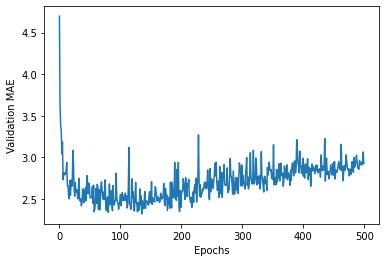

In [17]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

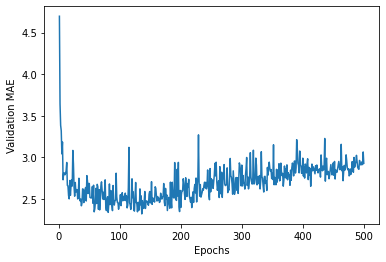

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Listing 3.31 Plotting validation scores, excluding the first 10 data points

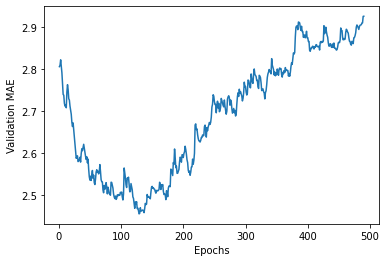

In [19]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Listing 3.32 Training the final model

In [20]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 7ms/step - loss: 16.4607 - mae: 2.5150


In [21]:
test_mse_score

16.460708618164062

In [22]:
test_mae_score

2.514993667602539

In [23]:
model.predict(test_data)

array([[ 7.913284 ],
       [18.512081 ],
       [22.697638 ],
       [31.278442 ],
       [25.806105 ],
       [21.841496 ],
       [28.854725 ],
       [22.61774  ],
       [18.958954 ],
       [21.549547 ],
       [18.785604 ],
       [16.935741 ],
       [15.234297 ],
       [43.41245  ],
       [20.072205 ],
       [20.553358 ],
       [25.876863 ],
       [19.35893  ],
       [18.442564 ],
       [26.620733 ],
       [11.386091 ],
       [14.873701 ],
       [22.072544 ],
       [17.072441 ],
       [20.90899  ],
       [23.902084 ],
       [28.528791 ],
       [31.311186 ],
       [11.321548 ],
       [19.826956 ],
       [20.521837 ],
       [14.170404 ],
       [35.407597 ],
       [24.149336 ],
       [17.85034  ],
       [ 7.4447107],
       [16.822083 ],
       [18.82694  ],
       [18.403639 ],
       [27.7082   ],
       [31.957182 ],
       [28.446257 ],
       [13.600521 ],
       [44.28024  ],
       [28.94879  ],
       [25.791777 ],
       [29.28001  ],
       [18.47